In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Replace 'dataset.csv' with the path to your dataset.
from google.colab import files

# Upload your dataset
uploaded = files.upload()

# Load the dataset
dataset = pd.read_csv(list(uploaded.keys())[0])

# Display the first few rows of the dataset
print(dataset.head())


Saving dataset.csv to dataset (1).csv
       Race  Gender Age_Group True_Label Predicted_Label
0     White    Male     Young   Positive        Positive
1     Black  Female     Adult   Negative        Negative
2     Asian  Female    Senior   Positive        Negative
3  Hispanic    Male     Young   Positive        Positive
4     White  Female     Adult   Negative        Positive


In [ ]:
# Function to analyze representation
def analyze_representation(data, column):
    representation = data[column].value_counts(normalize=True) * 100
    print(f"Representation Analysis for {column}:")
    print(representation)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=representation.index, y=representation.values)
    plt.title(f"Representation in {column}")
    plt.ylabel("Percentage")
    plt.xlabel(column)
    plt.show()


Representation Analysis for Race:
Race
White       26.666667
Black       26.666667
Asian       26.666667
Hispanic    20.000000
Name: proportion, dtype: float64


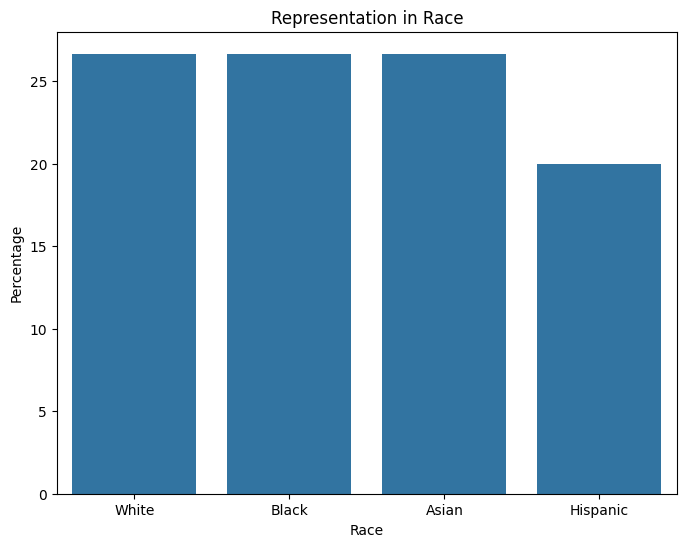

Representation Analysis for Gender:
Gender
Male      53.333333
Female    46.666667
Name: proportion, dtype: float64


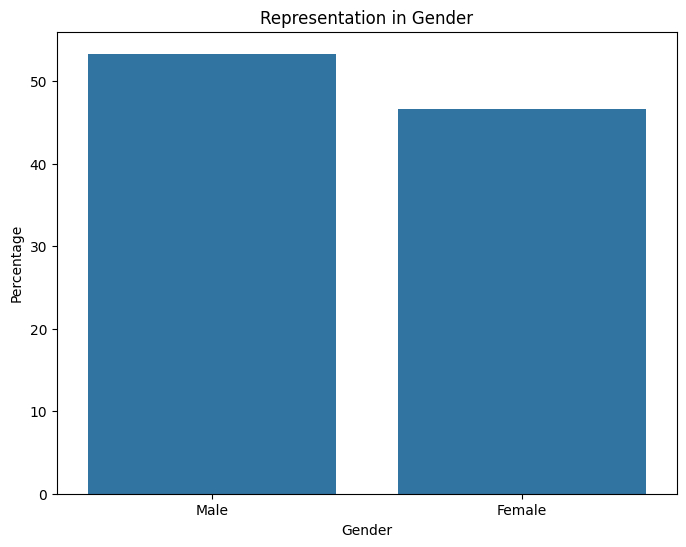

Representation Analysis for Age_Group:
Age_Group
Young     33.333333
Adult     33.333333
Senior    33.333333
Name: proportion, dtype: float64


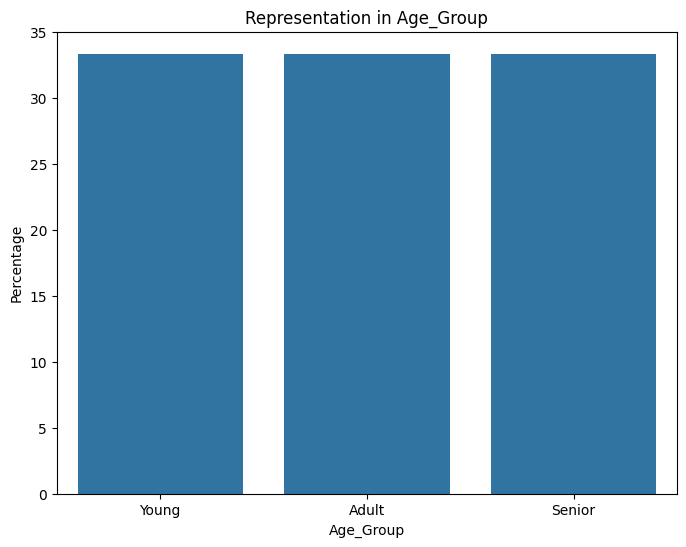

In [ ]:
# Analyze representation for Race, Gender, and Age_Group
analyze_representation(dataset, 'Race')
analyze_representation(dataset, 'Gender')
analyze_representation(dataset, 'Age_Group')


In [ ]:
# Updated function for bias analysis
def analyze_bias(data):
    # Compute confusion matrix and classification report
    confusion = confusion_matrix(data['True_Label'], data['Predicted_Label'], labels=["Positive", "Negative"])
    print("Confusion Matrix:\n", confusion)
    report = classification_report(data['True_Label'], data['Predicted_Label'], target_names=["Positive", "Negative"])
    print("Classification Report:\n", report)

# Call the function to analyze bias
analyze_bias(dataset)



Confusion Matrix:
 [[5 3]
 [2 5]]
Classification Report:
               precision    recall  f1-score   support

    Positive       0.62      0.71      0.67         7
    Negative       0.71      0.62      0.67         8

    accuracy                           0.67        15
   macro avg       0.67      0.67      0.67        15
weighted avg       0.67      0.67      0.67        15



In [ ]:
# Function to detect overrepresentation and underrepresentation
def detect_imbalance(data, column):
    print(f"Checking for imbalance in {column}...")
    imbalance = data[column].value_counts()
    overrepresented = imbalance[imbalance > imbalance.mean()]
    underrepresented = imbalance[imbalance < imbalance.mean()]
    print("Overrepresented Groups:\n", overrepresented)
    print("Underrepresented Groups:\n", underrepresented)



In [ ]:
# Check imbalance for Race, Gender, and Age_Group
detect_imbalance(dataset, 'Race')
detect_imbalance(dataset, 'Gender')
detect_imbalance(dataset, 'Age_Group')


Checking for imbalance in Race...
Overrepresented Groups:
 Race
White    4
Black    4
Asian    4
Name: count, dtype: int64
Underrepresented Groups:
 Race
Hispanic    3
Name: count, dtype: int64
Checking for imbalance in Gender...
Overrepresented Groups:
 Gender
Male    8
Name: count, dtype: int64
Underrepresented Groups:
 Gender
Female    7
Name: count, dtype: int64
Checking for imbalance in Age_Group...
Overrepresented Groups:
 Series([], Name: count, dtype: int64)
Underrepresented Groups:
 Series([], Name: count, dtype: int64)


In [ ]:
# Function to rebalance the dataset
def rebalance_data(data, column):
    balanced_data = data.groupby(column, group_keys=False).apply(lambda x: x.sample(data[column].value_counts().min()))
    return balanced_data


In [ ]:
# Rebalance the dataset by 'Race' (as an example)
balanced_dataset = rebalance_data(dataset, 'Race')

# Check the new distribution
print("Balanced Dataset Distribution:\n", balanced_dataset['Race'].value_counts())

# Save the balanced dataset
balanced_dataset.to_csv('balanced_dataset.csv', index=False)
print("Balanced dataset saved as 'balanced_dataset.csv'.")


Balanced Dataset Distribution:
 Race
Asian       3
Black       3
Hispanic    3
White       3
Name: count, dtype: int64
Balanced dataset saved as 'balanced_dataset.csv'.


<ipython-input-11-f991bce996cc>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby(column, group_keys=False).apply(lambda x: x.sample(data[column].value_counts().min()))


In [ ]:
from google.colab import files

# Download the balanced dataset
files.download('balanced_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Function to analyze subgroup-specific performance
def subgroup_performance(data, subgroup_column):
    subgroups = data[subgroup_column].unique()
    for subgroup in subgroups:
        subgroup_data = data[data[subgroup_column] == subgroup]
        print(f"Performance for {subgroup_column} = {subgroup}:")
        confusion = confusion_matrix(subgroup_data['True_Label'], subgroup_data['Predicted_Label'], labels=["Positive", "Negative"])
        print("Confusion Matrix:\n", confusion)
        report = classification_report(subgroup_data['True_Label'], subgroup_data['Predicted_Label'], target_names=["Positive", "Negative"])
        print("Classification Report:\n", report)

# Analyze subgroup performance for Race, Gender, and Age_Group
subgroup_performance(dataset, 'Race')
subgroup_performance(dataset, 'Gender')
subgroup_performance(dataset, 'Age_Group')


Performance for Race = White:
Confusion Matrix:
 [[2 0]
 [1 1]]
Classification Report:
               precision    recall  f1-score   support

    Positive       1.00      0.50      0.67         2
    Negative       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Performance for Race = Black:
Confusion Matrix:
 [[0 0]
 [1 3]]
Classification Report:
               precision    recall  f1-score   support

    Positive       1.00      0.75      0.86         4
    Negative       0.00      0.00      0.00         0

    accuracy                           0.75         4
   macro avg       0.50      0.38      0.43         4
weighted avg       1.00      0.75      0.86         4

Performance for Race = Asian:
Confusion Matrix:
 [[2 2]
 [0 0]]
Classification Report:
               precision    recall  f1-score   support

    Positive       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

In [ ]:
# Check misclassification rates by subgroup
def misclassification_rate(data, subgroup_column):
    misclassifications = data[data['True_Label'] != data['Predicted_Label']]
    rates = misclassifications[subgroup_column].value_counts(normalize=True) * 100
    print(f"Misclassification Rates by {subgroup_column}:\n", rates)

# Analyze misclassification rates for Race, Gender, and Age_Group
misclassification_rate(dataset, 'Race')
misclassification_rate(dataset, 'Gender')
misclassification_rate(dataset, 'Age_Group')


Misclassification Rates by Race:
 Race
Asian       40.0
White       20.0
Hispanic    20.0
Black       20.0
Name: proportion, dtype: float64
Misclassification Rates by Gender:
 Gender
Female    80.0
Male      20.0
Name: proportion, dtype: float64
Misclassification Rates by Age_Group:
 Age_Group
Senior    40.0
Adult     40.0
Young     20.0
Name: proportion, dtype: float64


In [ ]:
# Install libraries
!pip install fairlearn aif360


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.3/232.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 9.6 MB/s eta 0:00:00


In [ ]:
from fairlearn.metrics import demographic_parity_difference

# Compute demographic parity difference for Race
parity_diff = demographic_parity_difference(
    y_true=dataset['True_Label'],
    y_pred=dataset['Predicted_Label'],
    sensitive_features=dataset['Race']
)
print("Demographic Parity Difference for Race:", parity_diff)

# Compute demographic parity difference for Gender
parity_diff_gender = demographic_parity_difference(
    y_true=dataset['True_Label'],
    y_pred=dataset['Predicted_Label'],
    sensitive_features=dataset['Gender']
)
print("Demographic Parity Difference for Gender:", parity_diff_gender)



Demographic Parity Difference for Race: 0.0
Demographic Parity Difference for Gender: 0.0
